# 01 Probability Theory
March 2022
Ultimate study guide for CMEE MLE Week.

**Probability**: What is the *chance* of a certain event occuring based on given random mechanisms? 

**Statistics**: Given this observation, what *inferences* can we make about the underlying mechanisms? 
- Can estimate specific values (point estimation)
- Intervals (Confidence/certainty)
- Hypothesis testing (M1 vs. M2)

## Random Variables (r.v.)
Any variable who takes on its value by chance. R.v. X can take on a set of possible values, each with their own probability. For example: X can be {x<sub>1</sub>, x<sub>2</sub>,...,x<sub>n</sub>}, where
 
 $$
     Pr(X=x_{n}) = f(x)
 $$
 and 
 $$
 \Sigma x_{n} = 1
 $$
 
 *To **fully characterise** a random variable, need to know:*
 1. All of its possible outcomes (domain/"support")
 2. The probability of hitting each outcome
 

Random Variables can be Discrete or continuous:

X is **discrete** if it can take on only a discrete collection of values (ie. counts, Integers).
 *Ex:* Let X be outcome from tossing a fair coin. X is a randm variable with support {$heads,tails$}, where $Pr(X=head)=Pr(X=tails)=0.5$
 
 X is **continuous** if it can take on a while range of real numbers. 
 *Ex:* X is tomorrow's temperature where -15C <= x <= 35.
 
## Probability Mass function (for discrete r.v.)
 PMF describes the *relative probability* that discrete r.v. X takes on each of its possible values 
 $$
 f_{X}(x)  or  f(x)
 $$
 
 Plotted, it takes on the form of vertical bars. One bar for each discrete possible value. 
 **SUM OF BARS ALWAYS EQUALS 1**

### 1) *X ~ Bernoulli(p)*
- *support*: Binary outcome of success or failure {$1,0$}
- *one parameter*: $p$, probability of success
$$
f_{X}(x) = p^x(1-p)^{1-x}
$$

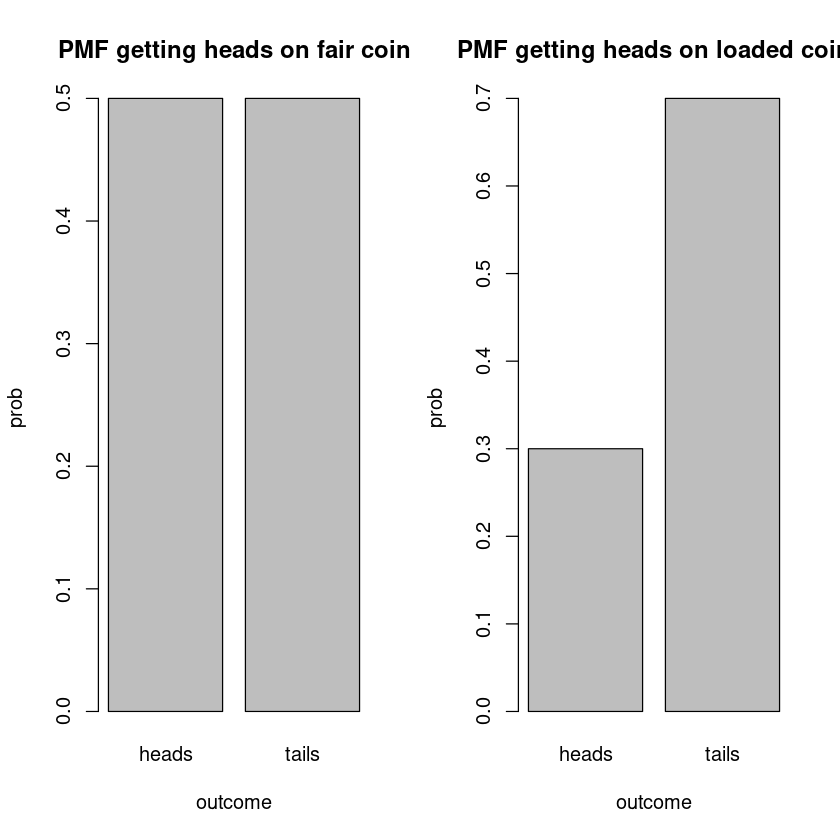

In [2]:
bernoulli <- function(x, p){
  # Paramters: p= probability of success
  # x = outcome
  pmf <- p^x*(1-p)^(1-x)
  return(pmf)
}

# Ex: PMF of getting heads in coin flip (p=0.5), x={0,1}
x <- c(0,1)
fair_pmf <- sapply(x, function(i) bernoulli(i, 0.5))
# Prob of a loaded coin (p=0.7). Higher prob of success
loaded_pmf <- sapply(x, function(i) bernoulli(i, 0.7))
                     
par(mfrow=c(1,2))
barplot(fair_pmf, xlab="outcome", names.arg=c("heads", "tails"),
       ylab="prob", main = "PMF getting heads on fair coin")
barplot(loaded_pmf, xlab="outcome", names.arg=c("heads", "tails"),
       ylab="prob", main = "PMF getting heads on loaded coin")

### 2) *X ~ Binomial(n, p)*
Sum of n independent and identically distributed (**i.i.d**) Bernoulli r.v.
- *support*: values {$0, 1, 2, ... n$} ie. $0\leq x \leq n$
- *Two parameters*: {n, p} (number of independent Bernoulli trials, probability of success)
$$
f_{X}(x) = C^n_{x}p^x(1-p)^{1-x}
$$
Where, 
$$
C^n_{x} = \frac{n!}{x!(n-x)!}
$$

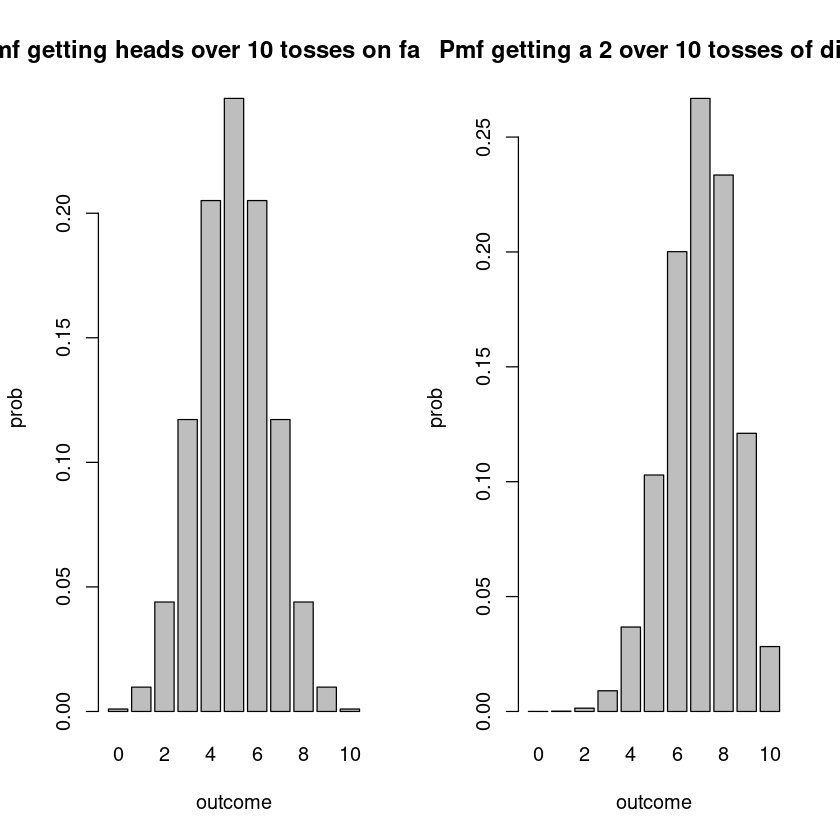

In [3]:
# Ex: Relative prob of getting head x/10 times on fair coin
x <- seq(0, 10, 1)  # bounded interval x "support"
pmf <- dbinom(x, 10, 0.5)
par(mfrow=c(1,2))
barplot(pmf, xlab="outcome", names.arg=seq(0, 10, 1), ylab = "prob",
       main = "Pmf getting heads over 10 tosses on fair coin")
              
# Six sided dice 
pmf <- dbinom(x, 10, 0.7)
barplot(pmf, xlab="outcome", names.arg=seq(0, 10, 1), ylab = "prob",
       main = "Pmf getting a 2 over 10 tosses of dice")        

### 3) *X ~ Poisson($\lambda$)*
Number of events occuring in a *fixed* interval of time
- *support*: All non-negative integers {$0, 1, 2, 3..., n$} $n\in \mathbb{Z}$
- *one parameter*: **$\lambda$**, How frequently the event occures in fixed time $\lambda > 0$
$$
f_{X}(x)= \frac{\lambda^x\exp-\lambda}{x!}
$$

[1] "Probability that x=4:"


[1] 0.1680314

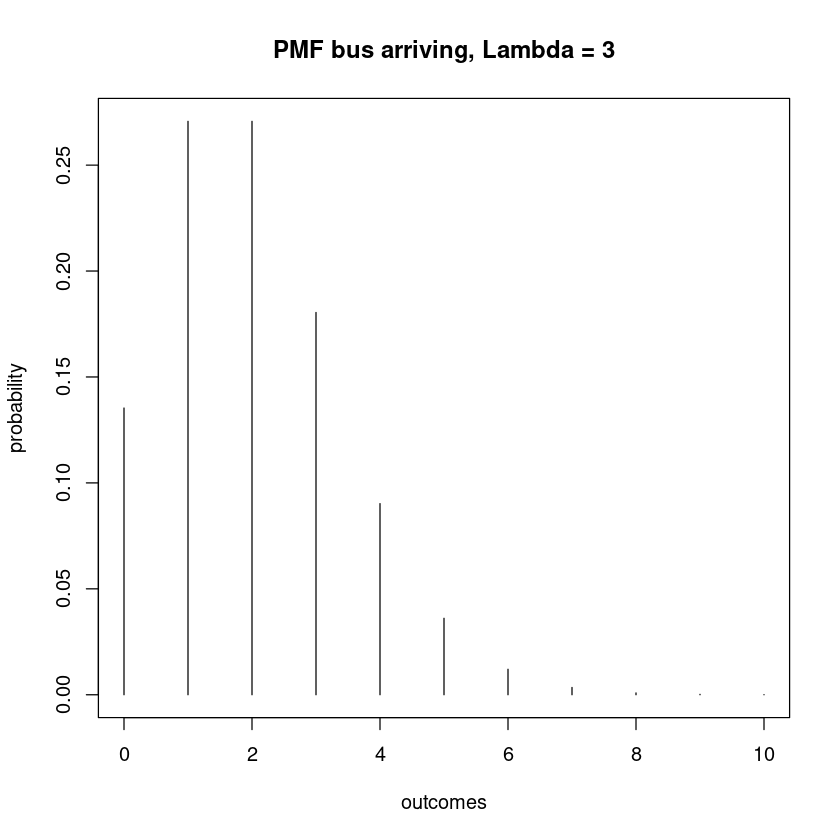

In [4]:
# Ex: Bus comes three every hour. Lambda = 3.
x <- 0:10 # Range over positive integers (possible outcomes)
pmf <- dpois(x, lambda=2) # Get density function

plot(x, pmf, type="h", xlab = "outcomes",
        ylab="probability", main = "PMF bus arriving, Lambda = 3")

print("Probability that x=4:")
dpois(4, lambda=3)

** Plot only goes to 10, but in theory poisson gives probability for any positive integer x: 

In [6]:
dpois(100, 3)  # very small

[1] 2.749403e-112

## Probability density functions
pdf describes the relative probability a continuous r.v. X takes on each value in a range of possible values. Each with non-zero probabilities. 
**AREA UNDER THE CURVE ALWAYS = 1**

### *X ~ uniform(a, b)*
Relative prob of x between random variables
- *Two parameters:* a, b: lower and upper bound
- *support*: $a\leq x \leq b$
$$
f_{X}(x)=\frac{1}{b-a}
$$

In [ ]:
# Prob of temperature tomorrow, where 4 <= t <= 15 degrees (assuming equal prob of all temps)
t <- seq(0, 20, 0.01) # continuous
prob <- dunif(t, min = 4, max=15)
plot(t, prob)

### *X ~ Exponential($\lambda$)*
Relative prob of time between events 
- parameter: $\lambda$, rate parameter
- support: ranges 0, to infinity (all non-negative Real numbers) [0,$\inf$]
$$
f_{X}(x)=\lambda e^{-\lambda x}
$$

In [ ]:
# Ex: X ~ Exponential(l=2), or "bus comes every two minutes"
x <- seq(0, 5, 0.01)
pmf <- dexp(x, 2) # Reaches limit at 2!
plot(x, pmf, xlab="outcome", ylab="probability", main = "pmf X ~ Exponential(lambda=2)")

### *X ~ N($\mu,\sigma^2$)*
Normal distribution
- Takes values over entire real number line $x\in\mathbb{R}$
- Two parameters: $\mu, \sigma^2$
$$
f_{X}(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
or
$$
f_{X}(x)=\frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x-\mu)^2}{2\sigma^2})
$$

X is the **"standard normal"** when $\mu=0$ and $\sigma^2=1$

### Calculating probabilities pdf 
For any continuous r.v., it is pointless to calculate the probability of X taking on a certain value. Since the support is infinite, any one point estimatiion will always be (nearly) zero. You can never hit a particular number. 

Instead, we can only calculate prob that x falls within an interval. $Pr(a\leq X \leq b)$. Here, the probability is the area under the curve between a and b.
$$
Pr(a\leq X\leq b) = \int^b_{a}f(x)dx
$$

In [8]:
# Example: X ~ Exp(l=2), prob 0 <= X <= 1
integrate(dexp, lower=0, upper=1, rate=2)

0.8646647 with absolute error < 9.6e-15

## Properties of pmf/pdf
### 1. Non-negative probs
Probabilities are always non-negative, thus pmf/pdf always plotted above x axis
### 2. Cumulative mass/density
R.v. can also be characterised by a cumulative function, denoted $F_{x}(x)$. All the probabilities accumulated up to x
$$
F_{X}(x) = Pr(X\leq x)
$$

For **discrete** r.v., this is the sum of all prob $x_{i}\leq x$ (sum of bars)
$$
F_{X}(x) = \Sigma_{x_{i}\leq x}f_{X}(x_{i})
$$

For **continuous** r.v. it is the area under the curve from -inf to x, where $$
F(-\infty)=0,  F(\infty)=1
$$
$$
F_{X}(x) = Pr(X\leq x)=\int^{x}_{-\infty}f_{X}(t)dt
$$

In [7]:
# Ex: Two buses come every hour. Calculate probability that X <= 3
sum(dpois(0:3, lambda=2)) #sum of all pdf less than three
# OR
ppois(3, lambda=2) # ppois gives cmd!

[1] 0.8571235

[1] 0.8571235

## Expectation
The hypothetical "average" of infinite trials on an r.v.- different from sample average taken from the data. "Average weighted value according to a pmf/pdf"
- E(X) is the *population mean* or "true" mean of the r.v. X
- Measure of *central tendency*
- "Expected value" of X

For **discrete** variables: sum of all outcomes(x)* f(x)
$$
E(X)=\Sigma x_{i}f_{X}(x)
$$

For **continuous** variables: the integral of all outcomes(x)*f(x)
$$
E(X)=\int_{-\infty}^{\infty}xf(x)dx
$$

Ex: Expectation of Bernoulli r.v. {0,1}
$$
E(X)=\Sigma\Big(\begin{array}{rcl}0\\1\end{array}\Big)p^x(1-p)^{1-x}
$$
$$
= p^0(1-p)^1 + p^1(1-p)^0 = 1 - p + p = p
$$

In [ ]:
# Example: Expectation that r.v. X ~ Binomial(n = 10, prob = 0.5)
EX <- sum(x*dbinom(x, 10, 0.5))
EX # Half the time 

In [ ]:
# Example: What is Expectation of r.v. X ~ Poisson(lamba = 2). Ie. two buses will come
x <- 0:10
EX <- sum(x*dpois(x, lambda=2))
EX # Equal to lambda

### Variance
Population variance: How disperse a random variable is from *expected* mean. *Expected square distance* of the r.v. from its *population mean*. 
$$
Var(X)=E[(X-E(X))^2]=E(X^2)-[E(x)]^2
$$
Where,
$$
E(X^2)=\int^{\infty}_{-\infty}x^2f(x)dx
$$

* Expectation follows linear transformation:
    $$
    E(x^n)=\int x^nf(x)dx
    $$
    $$
    E(g(x))=\int g(x)f(x)dx
    $$
    $$
    E(x+y)=E(x)+E(y)
    $$

### Statistical moments
nth moment of $E(X^n)$ each have statistical meaning- each derivation of expectation has statistical meaning. 
- $E(X)$ = Central tendency, statistical mean
- $E(X^2)$ = dispersion/variance
- $E(X^3)$= Skewness (whether pmf/pdf is symmetrical)
- $E(X^4)$= Kurtosis (how heavy the tail is)

### Moment generating function (mdf)
A third way of characterising a random variable is via $M_{X}(t)$. *t* is a dummy variable, and we evaluate the derivative at t=0. *Generates statistical moments* 
$$
E(X^n)=\frac{d^nM_{X}(t)}{dt^n}|t=0
$$
** nth Derivative of $M_{X}(t)$ generates nth moment of X

## Useful Functions in R

In [ ]:
# For each distribution, commands with prefix can: 

# GENERATE RANDOM SAMPLES FROM DISTRIBUTION
rnorm(3)  # number of samples 
rpois(3, lambda = 2)

# EVALUATE PMF/PDF
dnorm(x=1, mean=0, sd=1)
dpois(x=1, lambda=2)

# RETURN CUMULATIVE DENSITY FUNCTION (CDF)
pnorm(3, mean =0, sd=1) # 3 is upper interval

# QUANTILES
qnorm()
    

## Central Limit Theorem
CLT states that for any distribution with finite expected value (discrete, bounded) and variance (ie. binomial, bernoullie), the sample mean of random samples from that distribution tends to be normally distributed. 

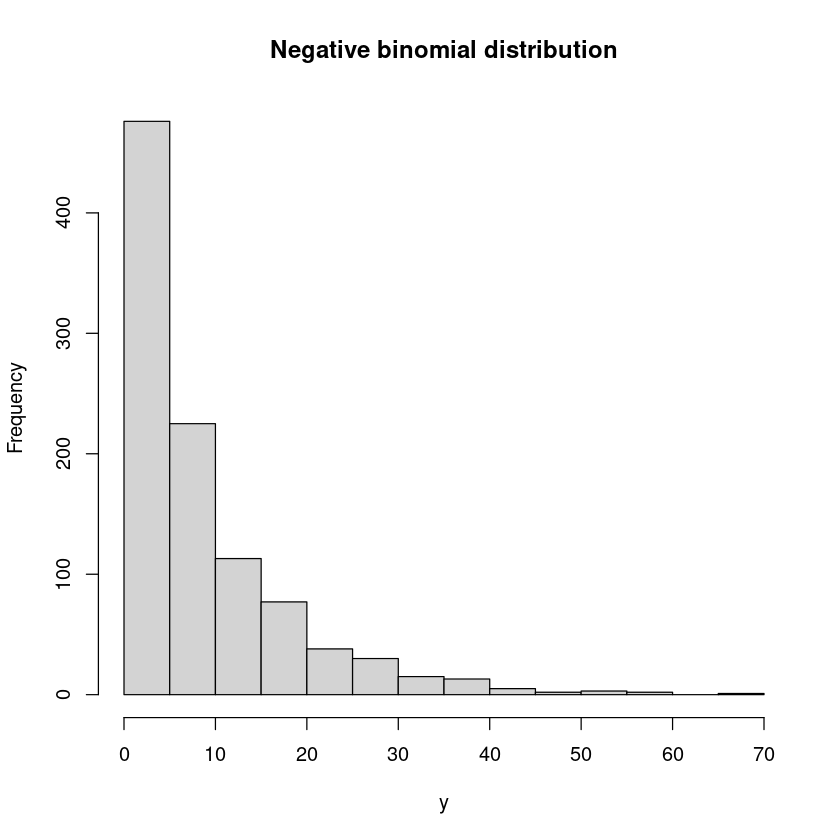

In [1]:
# Plot negative binomail distribution r=1, p = 0.1
y <- rnbinom(1000, 1, 0.1)
hist(y, main="Negative binomial distribution") # skewed

The distribution above is skewed, but CLT states the mean samples will follow a normal distribution. 

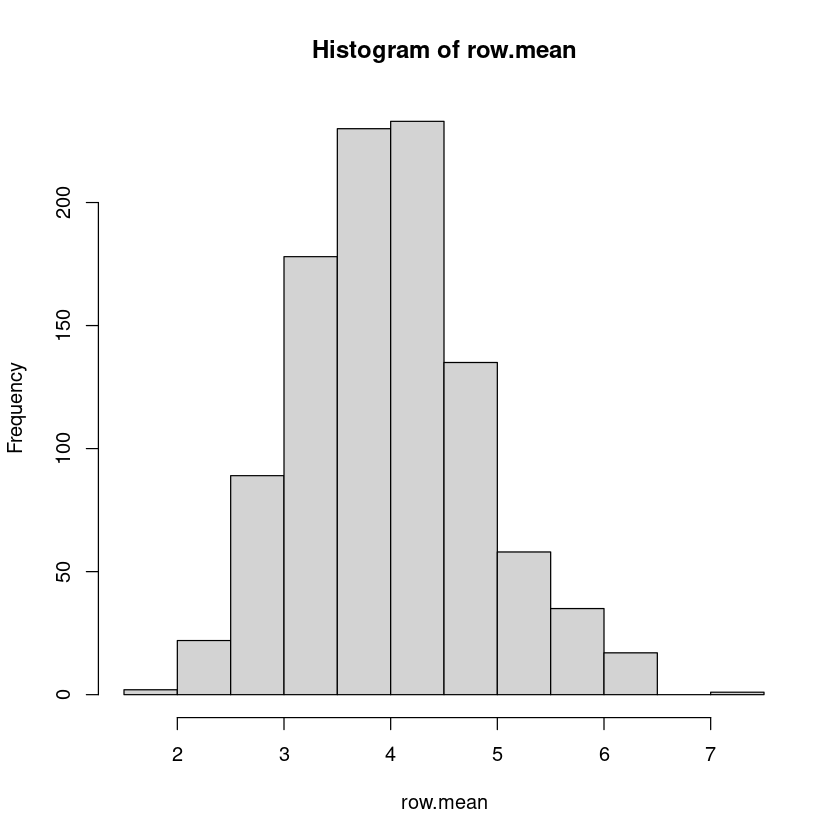

In [8]:
y <- matrix(rnbinom(30*1000, 1, 0.2), nr=1000, nc=30) # matrix of random values
row.mean <- apply(y, 1, mean)
hist(row.mean)  # Normally distributed!

CLT holds for samples larger than 30, generally speaking. Why normal distribution is so widely used!
- This makes sense when you think about the nature variance of between means of completely random samples

# 02 Probability and Likelihood
## Multivariate random variables 
Sometimes events occure simultaneously. These can interact with eachother, or coincide in a meaningful way. To characterise multivariate random variabes, use the concept of **"joint"**, multidimensional pdf/pmf that uses a 3D plot. 
### Bivariate normal distribution
An extension of univariate normal distribution, this support has two variables x, y.
- *support* = $\mathbb{R}^2$ Entire two-dimensional real number plane
- *parameters*: mean **vector**, and **variance co-variance matrix**, $\Sigma$

$$
\big(\begin{array}{rcl}X\\Y\end{array}\big)\approx MVN\Big(\mu=\big(\begin{array}{rcl}\mu_{1}\\ \mu_{2}\end{array}\big), \Sigma=\big(\begin{pmatrix}\sigma^2_{1} &p\sigma_{1}\sigma_{2} \\ p\sigma_{1}\sigma_{2} &\sigma^2_{2}\end{pmatrix}\big)\Big)
$$
where
$$
\Sigma=\Big(\begin{pmatrix} var_{1} & covar \\ covar & var_{2}\end{pmatrix}\Big)
$$

**For multivariate r.v., the total area under curve will be equal to 1**
$$
\int^{ymax}_{ymin}\int^{xmax}_{xmin}f_{YX}(x,y)dxdy = 1
$$

### Marginal distribution
Given a r.v. with joint pdf $f_{XY}(x, y)$, the distribution of just one variable, X, is the *marginal pdf* of X. Can obtain it by integrating out Y:
$$
f_{x} = \int^{\infty}_{-\infty}f_{XY}(x,y)dy
$$
And vice a versa for marginal pdf of Y.

Ex: $f_{XY}(x,y)=y(\frac{1}{2}-x)+x$, where $0<x<1$ and $0<y<2$
- Uniform distribution: bounded range of values
$$
f_{X}(x)=\int^2_{0}y(\frac{1}{2}-x)+x
$$
- Treat x as constant and integrate out y!
$$
=(\frac{1}{2}-x)\int^2_{0}ydf + x\int^2_{0}1dy
$$
$$
=2(\frac{1}{2}-x)+2x=1-2x+2x=1
$$
ie. 
$$
pdf = 1 = \frac{1}{a-b}
$$
X ~ Uniform(0, 1)

### Conditional Distribution
If the value of r.v. Y is known, this can give us information on the r.v. of X. *Conditional distribution of X given y*
- Equals the joint distributin of x and y, over marginal distribution of y. 
$$
f_{X|Y}(x|y)=\frac{f_{XY}(x, y)}{f_{y}(y)}
$$

Similarly, equation can be rewritten to get the joint distribution as the product of the conditional * the marginal
$$
f_{X|Y}(x|y)f_{y}(x)=f_{XY}(x,y)=f_{Y|X}(y|x)f_{Y}(y)
$$

### Nuisance Variables
Say Y is a random variable with pdf $f_{Y|U}(y|u)$, but U is another r.v. with marginal pdf $f_{U}(u|\theta)$. We are interested in finding pdf of y given $\theta$, *U* is just a nuissance intermediary.

*Law of total Probability* says we can use: 
$$
f_{Y}(y|\theta) = \int f_{Y|U}(y|u)f_{u}(u|\theta)du
$$
ie. integrate out all possible values of U, where *U is a marginal distribution*

### Covariance and Correlation
Describes the linear association between two r.v. **Covariance** is how two variables vary with one another, **correlation** is how a change in one variable results in a change of the other. Correlation is simply a bounded version of covariance such as to summarise relationship as a value between -1 and 1. 

### Independence
Independence is the most important assumption in statistics, since no formal or empirical way of truly proving independence. 

Two variables are *independent* if the occurence of one does not affect the occurence of the other at all. ie. X and Y are independent if $corr(X,Y)=0$
- if X and Y are indepdendent then $corr\big(g(X), h(Y)\big)=0$ too. 

Additionally their *joint probability* will be equal to the *product of their marginal distributions*- no impact of interaction/covariance. Cov is equal to zero in the matrix. 
$$
f_{XY}(x,y)=f_{X}(x)f_{Y}(y)
$$

## Maximum Likelihood Estimation
Likelihood is the central idea of statistics. MLE is a method to estimate parameters of a statistical model, such that the parameter values make the observed data set most *probable*. 
- Up until now we have been using given probabilities to find probability that X is $x_{i}$. MLE aims to find parameter estimates that best fit an observed data set. 

### Likelihood function
$L(\vec{\theta})$ quantifies how *likely* parameters are. Where $\vec{\theta}$ is a vector of parameters, and $\vect{x}$ is a vector of observations. 

By definition, the likelihood function is the *joint density* of $\vec{x}$. If $\vec{x}$ are independent, then the joint density of $\vec{x}$ equals the product of all individual densities $f(x_{i})$
$$
L(\vec{\theta}|\vec{x})= f(x_{1},...,x_{n}|\vec{\theta})=\Pi^n_{i=1}f_{X_{i}}(x_{i}|\vec\theta)
$$

- Once $\vec{x}$ is observed, $L(\vec{\theta}|\vec{x})$ becomes a function of $\vec{\theta}$ only.
- We tend to deal in log-likelihoods, since then we deal with the log-sum of individual densities. 

**In sum:**
For a set of $\vec{x}$ fixed observations and a given model, $\hat{\theta}$ is the parameter value at which $L(\vec{\theta}|\vec{x})$ (likelihood of those parameters given obersvation x) is at its maximum. 
- $\hat{\theta}$ is the maximum likelihood estimate for parameter $\vec{\theta}$

**MLE is made up of**
- Model (pmf/pdf above)
- Parameters
- Data (observed x)

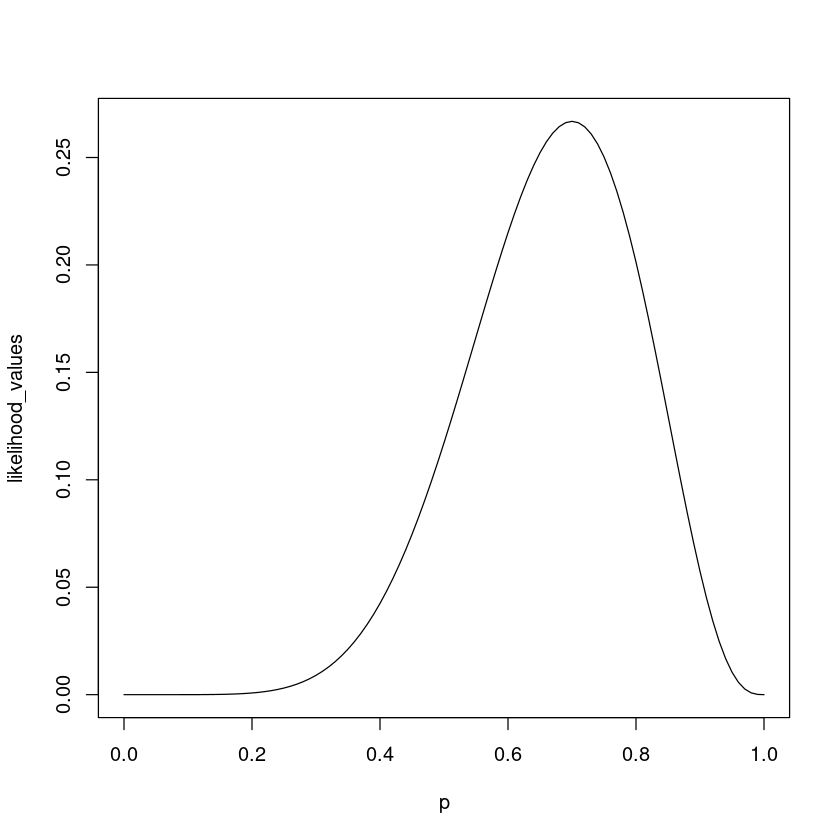

In [25]:
# EX: We flip 10 coins independently, and observe 7/10 heads
# If we define p as Probability of getting heads, what is the value
# of p that is most likely? (MLE for p?)

# 1. Define the function
binomial <- function(p){
  # Parameters: n= total trials, p= probability (same for each)
  # x = outcome
    x <- 7
    n <- 10
  bc <- factorial(n)/(factorial(x)*factorial(n-x))
  pmf <- bc*p^x*(1-p)^(n-x)
  
  return(pmf)
}

# 2. Likelihood for a range of P
p <- seq(0, 1, 0.01)
likelihood_values <- sapply(p, function(i) binomial(p= i))
plot(p, likelihood_values, type="l") # Can see maximum

If earlier we were making *probablistic* statements (ie. if we toss 10 coins, what is prob of getting 7?), now we are making *statistical inferences*: If we observe 7/10 heads, what can we say about the coin? 

### Maximisation
Find MLE by calculating the max point of the function. Manually, this is done by finding the where the derivative (slope) equals zero (along with other considerations you learned in maths week). In many cases, MLE can not be solved explicitly, thus you can maximise them numerically via computer:
** Optimise is for one-dimensional likelihoods

In [26]:
optimize(binomial, interval=c(0,1), maximum=TRUE) # Max gives MLE of P
# Objective gives value of max likelihood (L(p))- likleihood
# of model given p

$maximum
[1] 0.6999843

$objective
[1] 0.2668279

## Linear Regression
Consider standard linear model: 
$$
y_{i}=a+bx_{i}+e_{i}
$$
- Linear models assume i.i.d. normally distributed error terms: 
    $$
    e_{i}~N(0,\sigma^2)
    $$
- Has data (x, y variables)
- takes on parameters a (intercept), b (slope) and $\sigma^2$(variance)

**PERSPECTIVE ONE**: Can look at the distribution of responses $y_{i}$.

Each response variable $Y_{i} ~ N(a+bx_{i},\sigma^2)$, independently
- Each $y_{i}$ will have a difference mean and one common variance
- Likelihood function looks like: 
$$
L(\vec{\theta})=f(y_{1},y_{2},...,y_{n}|\vec{\theta}) = Pi^n_{i=1}f_{Y_{i}}(y_{i}|\vec{\theta})
$$

In [31]:
# Ex:
log_likelihood_regression <- function(parm, dat){
    # Returns log-likelihood of linear regression with input parameters
    # and data. 
    
  # Define the parameters from vector
  a <- parm[1]
  b <- parm[2]
  sigma <- parm[3]
  
  #Define the data dat
  x <- dat[,1]
  y <- dat[,2]

    #calculate density of each point in y
    density <- dnorm(y, mean=a+b*x, sd=sigma, log=TRUE) # mean is product of parameters for each point x
    
    # Log likleihood is the sum of individual log densities 
    return(sum(density))
}

**PERSPECTIVE TWO**: Alternatively, since we know $\epsilon_{i}$ is normally distributed with mean of 0 and var of 1, can rewrite the regression to make $\epsilon$ the subject, 
$$
\epsilon_{i}=y_{i}-a-bx_i
$$
Then find likelihood of model using normal distributon of $\epsilon$

In [29]:
log_likleihood_regression_e <- function(parm, data){
      # Get log likelihood regression on e
  # Define the parameters from vector
  a <- parm[1]
  b <- parm[2]
  sigma <- parm[3]
  
  #Define the DATA dat
  x <- dat[,1]
  y <- dat[,2]
  
  # Model on error terms. 
  error_term <- (y-a-b*x)
  
  density <- dnorm(error_term, mean = 0, sd = sigma, log=TRUE) # normally distributed
  
  # Log-likelihood is sum of all densities
  return(sum(density))
}

Once our equations are written, we can perform MLE to find the parameter values that make the model most likely. Use optim() for multiple parameters in R:

In [32]:
# Rabbits were tagged and released, then recaptured and measured.
# What is the relationship between recorded growth time since recaptured?
recapture <- read.csv("recapture.csv", header = T)

# Find MLE for parameters a, b and sigma^2
# Use optim, which begins with vector of input starting parameters, 
# and rages over bounded parameter space to find values that maximise
# likelihood

optim(par=c(1, 1, 1), log_likelihood_regression, 
     method = "L-BFGS-B", #optimisation algorithm that requires upper and lower bounds
     lower=c(-1000, -1000, 0.0001), # Variance can't be less than zero
     upper=c(1000, 1000, 100000),
     control = list(fnscale=-1), # maximises likelihood, default is to minimize
     dat=recapture,
     hessian=TRUE)

# Want to try multiple sets of initial parameters to ensure they
# all converge to the same global maximum. 

-4.042387e+00,-8.369675e+00,-1.776357e-08
-8.369675e+00,-2.627823e+01,-1.776357e-08
-1.776357e-08,-1.776357e-08,-8.084781e+00


Above gives ML estimates (MLE) for each parameter(par), as well as overall likelihood of the function at its maximum (value)

In [35]:
# Can also do the same using the built in function lm()
# But not so easy wih more complicated cases
model <- lm(length_diff~day, data=recapture)
summary(model)


Call:
lm(formula = length_diff ~ day, data = recapture)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2499 -1.2226 -0.1297  0.9099  7.3179 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.5279     0.8833   1.730   0.0951 .  
day           2.6762     0.3464   7.725 2.62e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.776 on 27 degrees of freedom
Multiple R-squared:  0.6885,	Adjusted R-squared:  0.677 
F-statistic: 59.67 on 1 and 27 DF,  p-value: 2.622e-08


In [37]:
# Above gives estimates for A and B
# Can calculate variance
n <- nrow(recapture) # number of cases
sqrt(var(model$residual)*(n-1)/n)

[1] 2.678428

# 03 Hypothesis Testing
## Useful Properties of MLE
Why maximum likelihood is so valuable- useful theoretical properties: 

**1) Aymptotically Unbiased**: On average, when using MLE we are hitting the true parameter values, so it's generally quite accurate (downside is it's not strictly unbiased). 
$$
E[\hat(\theta)] \rightarrow \theta, n \rightarrow \infty
$$
* Ie. unbiased as sample size tends to finity. 
$$
variance = \frac{n}{n-1}
$$
- As sample size gets larger, variance tends to one. (identity)

*Bias* a measure of accuracy, meanwhile, *precision* a measure of variability. 

**2) Low Variance:** Tends to summarise data better than other estimations, thus has narrower confidence intervals (more precision).

**3) Consistent:** ML estimator converges in *probability* to the true parameter when $n \rightarrow\infty$
- For example, consider a naive estimator made of only one random observation in a set of random samples. As the number of samples approaches infinity, the probability does not converve as uncertainty becomes huge (uncertainty on each point estimation)
- Meanwhile, an MLE that considers n observations, as n gets larger it does converge and uncertainty diminishes. 

**4) Aymptotically normal:** ML estimator is asymptotically distributed as normal where mean equals the true parameter value. IE. if we were to repeat the MLE process many times with different samples, those MLE would be normally distributed around one central, true parameter value. Makes construction of confidence intervals easier. 

**5) Invariant Principle**: Once a maximum likelihood parameter $\vec{\theta}$ is attained, it is the same maximum value of the parameter for all transformed $g(\vec{\theta})$
- ie. if $\vec{\theta}$ is the MLE parameter for $\theta$, then $g(\vec{\theta})$ is the MLE for parameter $g(\theta)$

## Logistic Regression
Consider binary response data, dead or alive, with a continuous explanatory variable x (cholesterol level). 
- Explanatory variable x is often called the "risk factor" as it is affects the prob (risk) of a bad binary outcome. 

Can use bernouille r.v. to model the likelihood of each state (dead or alive) along x. 
- For each response variable $y_{i}$ the probability of $p_{i}$ of a successful outcome will be a function of linear predictor
$$
y_{i}~Bernoulli(p_{i})
$$
Where, 
    $$
    p_{i}=\eta^{-1}(a+bx_{i})
    $$
- Transformation $\eta^{-1}$ is the *expit* transformation- inverse of *logit* $log\big(\frac{p}{1-p}\big)$, and guarantees the prob of success will be bounded between 0-1
$$
\eta^{-1}(a+bx_{i})=\frac{e^(a+bx_{i})}{1+e^(1+bx_{i})}
$$

Thus, *likelihood* function is joint pmf of all bernouille r.v. $y_{i}$
$$
L(a,b)=Pi[p_{i}^{yi}(1-0)^{1-y_{i}} = \Sigma[expit(a+bx_{i})^y_{i}(1-expit(a+bx_{i}))^{1-y_{i}}
$$

If we know x and y, then above function becomes function of a and b only, and can use ML to find best parameter estimates. 

## Likelihood Ratio Test (LTR)
Let M1 and M2 be two models, where M1 is nested inside of M2 such that M2 has *more* parameters than M1 (ie. M1 is a simplified version of M2)
- *d1,2* = parameters of M1,2
- *d2 > d1*
Then, the difference in log likelihood of L2 and L1, multiplied by two, approximately follows a chi-square distribution with (d2-d1) degrees of freedom: 
$$
D=2*(in(L2)-in(L1))
$$

- Here, D is the *likelihood-ratio statistic (LTR)*
- If D is smaller than the critical value as $\chi^2_{d2-d1}$ (Chi squared at d1-d2 degrees of freedom), M2 does not have significantly more explanatory power than M1. 
    - If L() measures the better fit of the model, D measures the difference in explanatory power. 
    - If this difference is insignificant, we should accept the model with the least amount of parameters. 

In [42]:
#Ex: Test the fair coin hypothesis (50/50 chance) at 5% 
# Significance level where we observe 7/10 heads
# h0: p=0.5, h1: p != 0.5

M1 <- dbinom(7, 10, 0.5, log=TRUE) # H0 has no parameters 
M2 <- dbinom(7, 10, 0.7, log=TRUE) # prob can be any !=, but we know 0.7 is MLE

D <- 2*(M2-M1)
D > qchisq(0.95, df=1) # h0 has no df (no choice) and M2 has one
# Accept null hypothesis, fair coin wins. 

# Test for 35/50 heads
M1 <- dbinom(35, 50, 0.5, log=TRUE) # H0 has no parameters 
M2 <- dbinom(35, 50, 0.7, log=TRUE) # prob can be any !=, but we know 0.7 is MLE

D <- 2*(M2-M1)
D > qchisq(0.95, df=1) # Reject fair coin hypothesis

[1] FALSE

[1] TRUE

**Methods:**
- Find log_likelihood for both models
- Calculate D
- Look up Chisq at d2-d1 df 

*Example: flowers*
Can the survival of a plant be determined from the number of flowers and the size of it's root? 
- plants are in one of two states (1=alive, 0=dead)
- Flowers and root size are continuous

$h_{1}$: Plants with more flowers are more likely to die in winter, and plants with bigger roots are less likely to die. 

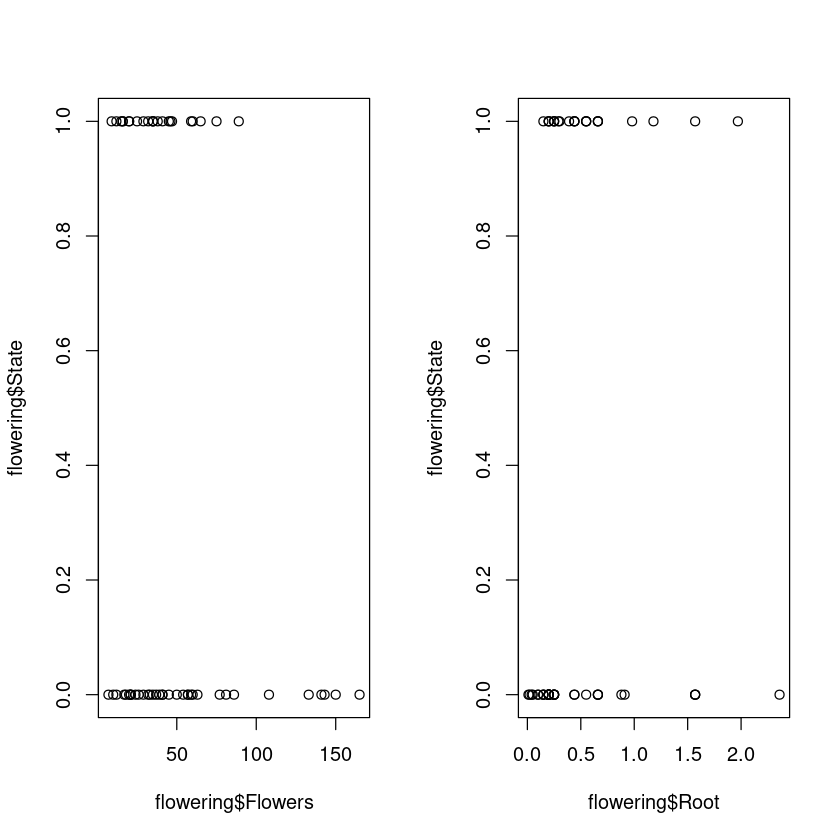

In [49]:
flowering <- read.table("flowering.txt", header = TRUE)
par(mfrow=c(1,2))
plot(flowering$Flowers, flowering$State)
plot(flowering$Root, flowering$State)

Plots of binary data not very informative. So lets fit a logistic regression to how probability of success changes according to our two explanatory factors. 
- Firstly, want to fit a logistic regression model to data set: 
$$
y_{i}~Bernoulli(p+{i})
$$
$$
p_{i} = expit(a+b*flowers_{i}+c*Root_{i})
$$

In [58]:
logistic_log_likelihood <- function(parm, dat) {
# Returns log-likelihood of linear regression with input parameters
    # and data. 
    
  # Define the parameters from vector
  a <- parm[1] # intercept
  b <- parm[2]
  c <- parm[3]
  
  #Define response variable
    state <- dat[,1]
    flowers <- dat[,2]
    root <- dat[,3]

# Model success of probability 
    p <- exp(a+b*flowers+c*root)/(1+exp(a+b*flowers+c*root))
    log_like <- sum(state*log(p)+(1-state)*log(1-p))
    return(log_like)
}

# Maximise log-likelihood 
M1 <- optim(c(0, 0, 0), logistic_log_likelihood, dat=flowering,
           control=list(fnscale=-1), hessian=T) # method at default- no bounds needed for these parameters
M1 # give us best parameter values for the model

plot(flowers)

-9.078849,-334.8053,-3.761310
-334.805296,-19493.1890,-245.166194
-3.761310,-245.1662,-3.371567


ERROR: Error in plot(flowers): object 'flowers' not found


Now let's find the likelihood of a model that accounts for the interaction of roots and flowers on state as well as roots and flowers independently. 

In [61]:
# Interaction: 4 parameter model
logistic_log_likelihood_interaction <- function(parm, dat){
  # MLE with interaction of variables
  a <- parm[1]
  b <- parm[2]
  c <- parm[3]
  d <- parm[4]
  
  state <- dat[,1]
  flowers <- dat[,2]
  roots <- dat[,3]
  
  p <- exp(a+b*flowers+c*roots+d*flowers*roots)/(1+exp(a+b*flowers+c*roots+d*flowers*roots))
  log_like <- sum(state*log(p) + (1-state)*log(1-p))
  
  return(log_like)
}

M2 <- optim(par=c(0, 0, 0, 0), fn=logistic_log_likelihood_interaction, 
           dat=flowering, control = list(fnscale=-1))

# Does the interaction variable give the model significantly 
# more explanatory power? 
D <- 2*(M2$value-M1$value)
D > qchisq(0.95, 1) # one df since one parameter difference

# D is larger than critical value, thus M2 does have signficantly
# more explanatory power

[1] TRUE

## Non-Constant Variance
In rabbits example above, model assumes a constant variance. However, we can observe variance seems to increase with day (ie. as time goes on, rabbits tend to have more variance in growth differences). 
- Can incorportate nonconstant variance in our regression by making the standard deviation of the error terms increase linerarly with the number of days (could not do with lm(), but easy with MLE)
$$
\epsilon_{i}~N(0, x^2_{i}\sigma^2)
$$
- Mean is zero and variance is sigma times x, ie. sigma increase with time. 

In [62]:
log_likelihood_non_constant_variance <- function(parm, dat){
        # Returns log-likelihood of linear regression with input parameters
    # and data. 
    
  # Define the parameters from vector
  a <- parm[1]
  b <- parm[2]
  sigma <- parm[3]
  
  #Define the data dat
  x <- dat[,1]
  y <- dat[,2]

    #calculate density of each point in y
    density <- dnorm(y, mean=a+b*x, sd=sigma*x, log=TRUE) # Sigma*x
    
    # Log likleihood is the sum of individual log densities 
    return(sum(density))
}

# 04 Interval Estimation
When finding point estimates through MLE, it's important to quote the confidence intervals (CI)- making explicit any uncertainty surrounding those estimates. 

Instead of performing the above likelihood ratio test against specific values of $p$ (as we did in the coin tossing example, testing p=0.5 vs. p=0.7), we can find a range of p such that D remains within the "acceptance region":
If 
$$
D=2*(In(L2)-In(L1))
$$
And the critical value for chi squared with one degree of freedom is 3.84, then we need a collection of p, such that:
$$
D < 3.84
$$
$$
In(L2)-In(L1) < \frac{3.84}{2}=1.92
$$

In other words, we want to find the range of P, such that the loglikelihood descends by no more than *1.92* units from the maximum.
- The 95% CI for a parameter is a collection of parameter values whose likelihood is within 1.92 units from its maximum. 
- If we observed 7/10 tosses, the 95% CI for p is (0.39, 0.92). Since the "fair coin" hypothesis lies within this interval (p=0.5), we do not reject it!

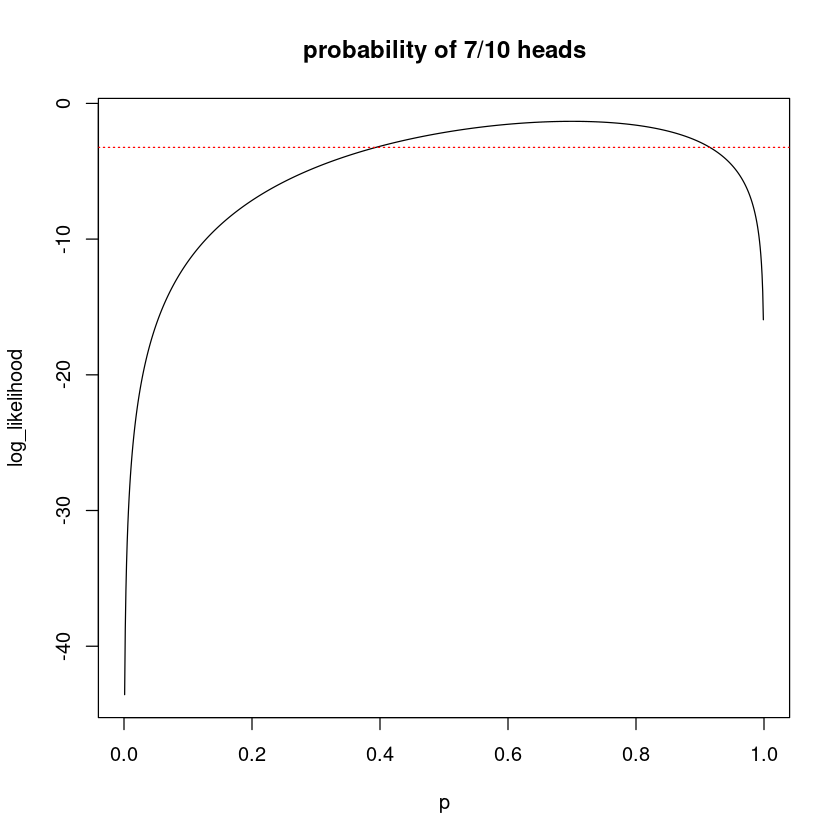

In [76]:
# 7/10 heads plotted 
p <- seq(0, 1, 0.001)
log_likelihood <- sapply(p, function(i) dbinom(7, 10, i, log=TRUE))
plot(p, log_likelihood, type="l", main="probability of 7/10 heads")
interval <- max(log_likelihood)-1.92 # range of values within 1.92 units of max
abline(h=interval, col = "red", lty=3, )

- 95% CI for probability is range of all values within that 1.92 units from max. 
- Thus, upper and lower bounds of the CI are the two points of intersection. 

## CI for Two Parameter Linear Regression
- Take a model from the rabbit.recapture example above. This model only has two parameters (b, sigma) - previous a (intercept) parameter removed since if rabbits are recaptured on the same day, growth tends to be zero. We tested this using LTR, but CBA to show it again)
- The function (b, sigma) is bivariate, so needs a 3D plot:

In [143]:
log_likelihood_regression_M1 <- function(parm, dat) {
  # Likelihood for M1 with no intercept
  b <- parm[1]
  sigma <- parm[2]
  
  #Define the DATA dat
  x <- dat[,1]
  y <- dat[,2]
  
  error_term <- (y-b*x) # no intercept
  
  density <- dnorm(error_term, mean = 0, sd = sigma, log=T)
  
  return(sum(density))
}
M1 <- optim(par=c(1,1), log_likelihood_regression_M1,
            dat = recapture, method = 'L-BFGS-B', lower = c(-1000, 0.0001),
            upper = c(1000, 10000), control=list(fnscale=-1),
            hessian=TRUE)

# Compute the log-likelihood value for each pair of parameters
b <- seq(2, 4, 0.1)
sigma <- seq(2, 5, 0.1)
log_likelihood_values <- matrix(nr=length(b), nc=length(sigma)) # Preallocate matrix for pairwise loglikelihood values

# Run log_likelihood function for all pairs
for (i in 1:length(b)){ # for each value of b, apply log likleihoods for b and each value of y
    # Creates rows for matrix
    log_likelihood_values[i,] <- sapply(sigma,
                            function(n) log_likelihood_regression_M1(c(b[i], n), recapture))
}

                                                     
# Get log_likelihood values relative to the peak (maximum)
# Makes all likelihoods relative to zero, thus CI is -1.92
relative_log_likelihood_values <- log_likelihood_values-M1$value # minus max loglikelihood

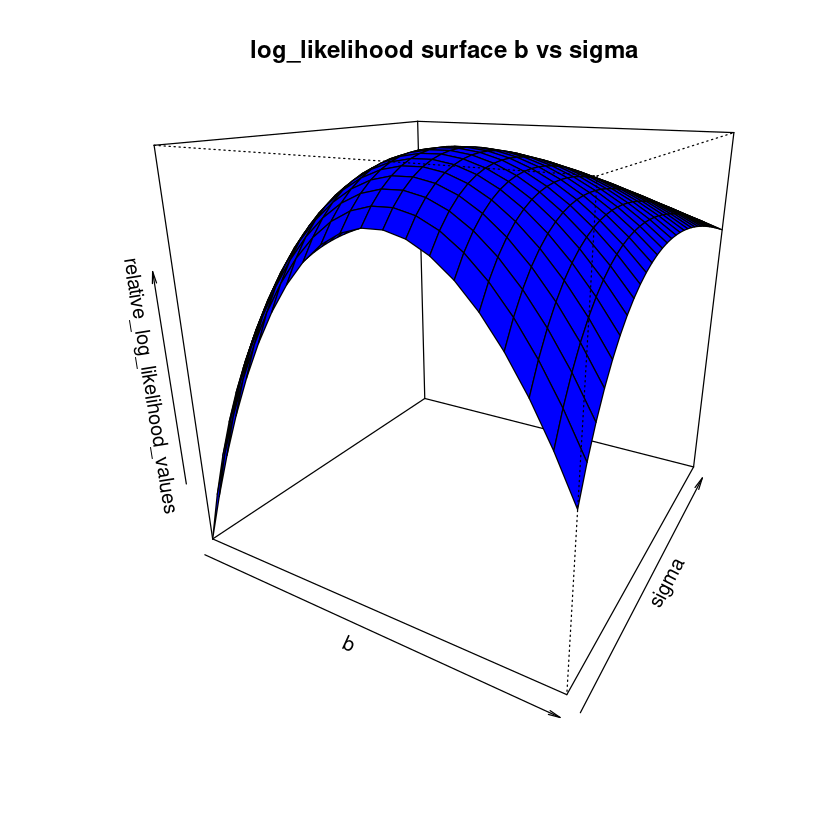

In [144]:
# Make 3D plot!
persp(b, sigma, relative_log_likelihood_values, theta=30, 
     phi=20, xlab='b', ylab='sigma',zlab='relative_log_likelihood_values', 
      col = "blue", main = "log_likelihood surface b vs sigma")

- Max values for each b and sigma located on own axis agaisnt log likelihood (can see two curves)
- Joint log_likelihood product of all three axis... somehow?

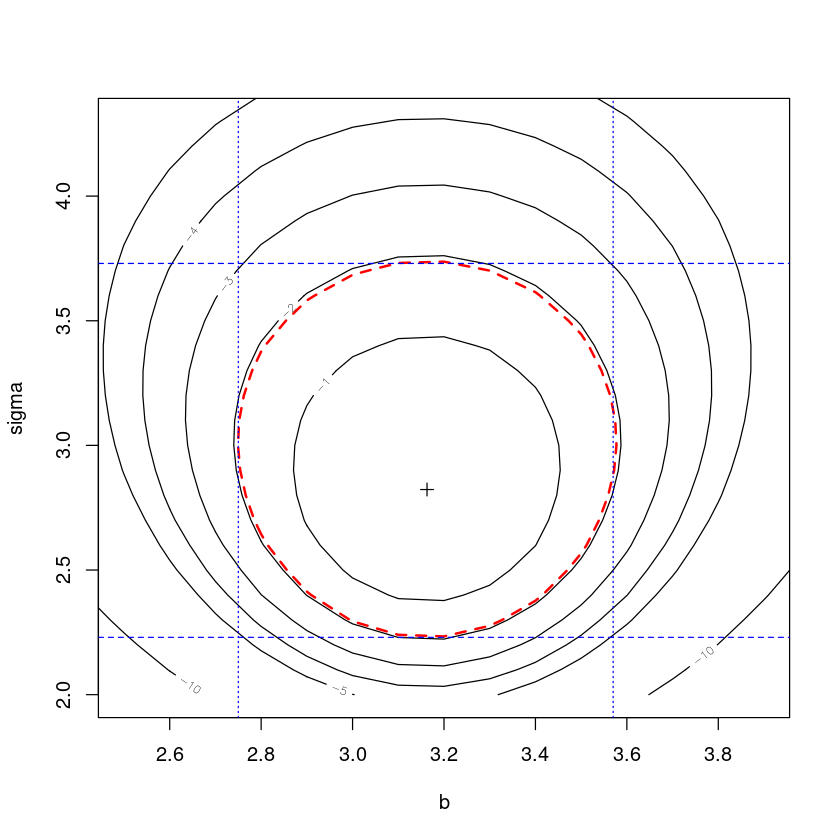

In [161]:
# Create contour plot
contour(b, sigma, relative_log_likelihood_values, xlab='b', ylab = 'sigma',
       xlim=c(2.5, 3.9), ylim=c(2.0, 4.3), levels=c(-1:-5, -10), cex=2)
# Draw a cross to indicate the maximum
points(M1$par[1], M1$par[2], pch=3)

# Draw -1.92 interval
contour_line <- contourLines(b, sigma, relative_log_likelihood_values, 
                             levels=-1.92)[[1]] # Gives axis values for circular level

lines(contour_line$x, contour_line$y, col="red", lty=2, lwd=2)

abline(v=c(2.75, 3.57), lty=3, col="blue")
abline(h=c(2.23, 3.73), lty=2, col="blue") # Values estimated by eye!

Above plot shows different values of sigma vs. beta and the point at which both of these values are maximised. The circles show regions -1, -2, -3 etc. units away from maximum.

We have also demarcated the region where values are within 1.92 units of the maximum value. Using this, can find the CI of either parameter (blue) by looking to tanget of each axis with point in circle. 

## Joint confidence interval (region)
Above shows the confidence intervals for *each* parameter a, sigma *individually*. This is **not** the same as knowing their **joint** 95% CI.
- Know confidence that maxb is max of parameter b, and max sigma is the max of parameter sigma.
- Joint CI gives confidence that maxb and maxsigma together are the max *combination* of parameters. 
    - Involves correlation between two ML estimators

General rule: 95% CI for k number of parameters, is the collection of parameters for which log_likelihood decreases by no more than half of chisq with given degrees of freedom, from its maximum. 
$$
In(L1)-In(L2) = \0.5*Chi^2_{0.95,df=k}
$$
- Above used chisq with only one degree of freedom to find individual CI (confidence intervals for b, and intervals for c independently each have one df when comparing difference from its maximum)
- For k=2 parameters with 1df each, we are dealing with a total of *2 degrees of freedom*
- Thus joint CI is 0.5*chisq(0.95,df=2) = 2.99

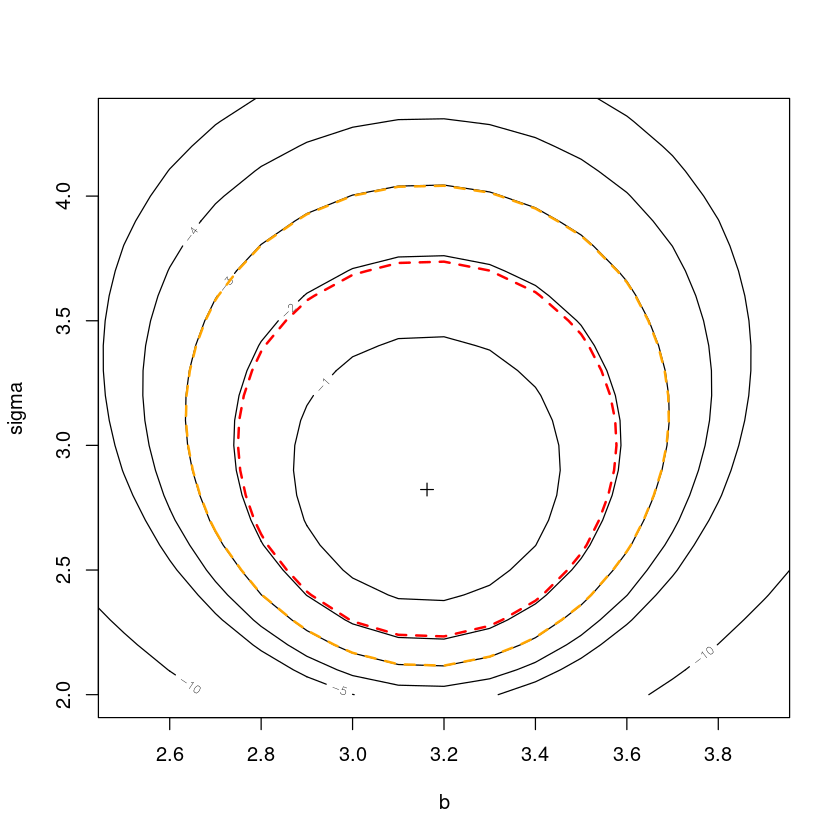

In [171]:
contour(b, sigma, relative_log_likelihood_values, xlab='b', ylab = 'sigma',
       xlim=c(2.5, 3.9), ylim=c(2.0, 4.3), levels=c(-1:-5, -10), cex=2)
points(M1$par[1], M1$par[2], pch=3)
contour_line <- contourLines(b, sigma, relative_log_likelihood_values, 
                             levels=-1.92)[[1]] # Gives axis values for circular level
lines(contour_line$x, contour_line$y, col="red", lty=2, lwd=2)

# 2.99 CI
contour_line2 <- contourLines(b, sigma, relative_log_likelihood_values, 
                             levels=-2.99)[[1]] # Gives axis values for circular level
lines(contour_line2$x, contour_line2$y, col="orange", lty=2, lwd=2)

Joint confidence region for (b, sigma) then all points within the orange dotted circle!
- ***NOTE!*** While here the joint CI encompasses the entire range of s,b values, this is not always the case
- it is possible for both parameters (b, sigma) to be within their own confidence intervals, yet for the pair together to lie outside of it!

## Profile Likelihood
General method for finding CI of single parameter in a model with multiple parameters
- For model M1 that takes vector of parameters, $\vec{\theta}$, we can partition the parameter vector into two subsets, $\vec{\theta}=(\vec{\theta_{1}},\vec{\theta_{2}}$), and find the CI for the first subset $\vec{\theta}$ only
    - Where chosen subset of parameters can be a single value, or a vector of parameters based on what you are after. 

Procedure is called profiling and involves partial maximisation of the original log-likelihood value along $\vec{\theta_{1}}$.

**Method:**
$$
l*(\vec{\theta_{1}})=maxl(\vec{\theta_{1}},\vec{\theta_{2}}; x)
$$
- Fix $\vec{\tilde{\theta_{1}}}$, then vary \vec{\theta_{2}} such that the log-likelihood is partially maximised (for values of $\vec{\theta_{2}}$ when $\vec{\theta_{1}}$ is fixed)
- record this partially maximised log_likelihood ($l*(\vec{\theta_{1}})$) and repeat this for a range of $\vec{\tilde{\theta_{1}}}$
    - This gives you the profile log-likelihood function for $\vec{\theta_{1}}$, which can be used to calculate the LTR and CI!
    
The reason you can't simply vary $\vec{\theta_{1}}$ is that there's no guarantee that for each maximised value of $\vec{\theta_{1}}$, the other estimates are also maximised. 

In [179]:
# Example: 
# Let's look at maximising parameter b in our flower example

profile_log_likelihood <- function(b){
    # Finds partially maximised log-likelihood for input b
    f <- function(parm_acd){
        # Runs logistic_log_likleihood_interaction function above
        # but with fixed parameter input b
        logistic_log_likelihood_interaction(c(parm_acd[1],
                                             b, 
                                             parm_acd[2],
                                             parm_acd[3]),
                                           dat=flowering)
    }
    
    temp <- optim(c(0, 0, 0), f, control=list(fnscale=-1))
    # Gives us partially maximised likelihood where each parameter is 
    # Maximised
    
    return(temp$value)
}

# Now going to evaluate profile log-likelihood of b around bmax
b <- seq(-0.19, -0.004, 0.002)
profile_log_likelihood <- sapply(b, function(i) profile_log_likelihood(i))
                                 

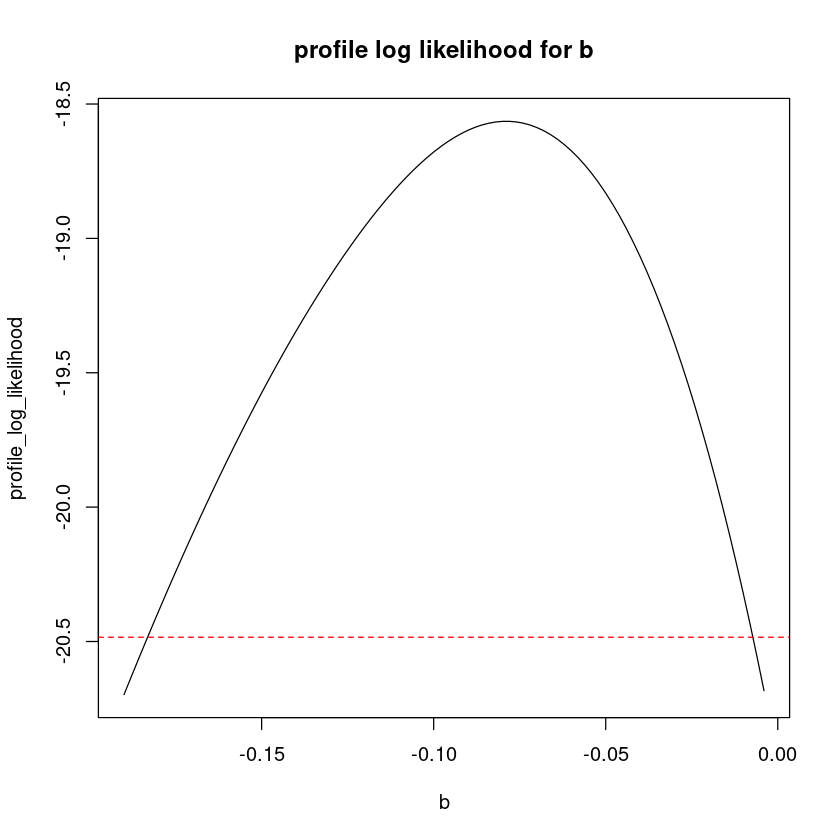

In [180]:
# Plot profile log-likelihood
plot(b, profile_log_likelihood, type='l', 
    main = "profile log likelihood for b")

# Draw line
abline(h=M2$value-1.92, col="red", lty=2)

The 95% CI for single parameter b is the region where the profile log-likelihood descends by no more than 1.92 units from the maximum. 
- The same principle can be applied to any number of parameters in $\vec{\theta_{1}}$, where after partial maximisation, the joint confidence region for a and b will be the region where their profile log-likelihood decreases no more than 0.5*Chisq(df=2) units from joint max. 

## Assuming Normality
Another method for finding CI makes use of approximate normality: 
- Recall from earlier, when the sample size tends to infinity, MLEs have the property of asymptotic normality

**One parameter CI**
- Under a normal distribution, the 95% CI for any *one parameter* point estimate $\theta$ is the following: 
$$
\hat{\theta} \pm 1.96\sqrt(var(\hat{\theta}))
$$
    - value 1.96 comes from 95% CI of the normal distribution
    
Here, $\sqrt(var(\hat{\theta}))$ = standard error
- Can be found by looking to the steepness of the l() curve: rate of change of the slope at maximum tells us how narrow the curve is, where narrower curve means narrower CI, and smaller variance
- Thus variance can be calculated using the *second derivative* of the log-likelihood-function, evaluated at $\hat{\theta}$ (max value of $\theta$)
$$
var(\hat{\theta})\approx -\frac{1}{l^{''}(\hat{\theta})}
$$

In [181]:
# Ex: 35/50 heads in a coin toss, where MLE p=0.7

second_derivative_bernoulli <- function(p){
  # Second derivative of log likelihood function of bernoulli r.v.
  # Rate of change of slope/curvature around max - how much variance there is around max
  n <- 50 # coin tosses
  y <- 35 # number of times head
  
  l2p <- -y/p^2 - (n-y)/(1-p)^2 # second derivative loglikelihood
  
  return(l2p)
}

intervals <- c(-1.96, 1.96)
variance <- -1*(1/second_derivative_bernoulli(0.7))
0.7+(intervals*sqrt(variance))

[1] 0.5729775 0.8270225

**Two parameter CI**
Approximate normality holds and ML estimators follow a *multivariate* normal distribution. 
- Recall parameters of multivariate normal distribution: $(\vec{\mu}, \Sigma)$
- Thus *variance is now a variance-covariance matrix*, $V(\hat{\vec{\theta}})$

The *Hessian Matrix* $H(\vec{\hat{\theta}})$ *is* the second derivative of log-likelihood function evaluated at its maximum. 
- Can find using optim when Hessian is marked as true

Thus it follows, 
$$
V(\hat{\vec{\theta}})\approx-H(\vec{\hat{\theta}})^{-1}
$$

Ie. can get variance covariance matrix by taking the reciprocal of the Hessian matrix times negative 1. 

In [182]:
# Use Hessian matrix to find CI of b and sigma in recapture 
result <- optim(par=c(1, 1), log_likelihood_regression_M1, 
               method='L-BFGS-B',
               lower=c(-1000, 0.0001), upper=c(1000, 10000),
               control=list(fnscale=-1), dat=recapture, hessian=T)
var_covar <- (-1)*solve(result$hessian) # use solve to get inverse of matrix

var_covar

4.227123e-02,-1.444362e-09
-1.444362e-09,1.373956e-01


Using this matrix, can find CI for each parameter on their own, 
or can apply multivariate testing (beyond scope of course). 

**Note**- assuming normality can give slightly different results when used to test joint hypothesis, that's why the likelihood method (computing the joint intervals using contour plot) is generally prefered).

# 05 Likelihood Examples
## Limitations of MLE
Although MLE is the best method, sometimes it is hard to implement. 
- Quite often there's no closed form solution- can only be solved analytically
- Nuissance variables, where there is an intermediate linking unobserved variables
    - pdf them takes form of integrals, which is quite hard to maximise. (ex: random effect model)
- Computational issues to do with dimensionality (too many parameters)- maximisation pulling in so many directions that its optimally not efficient enough to evaluate all exhaustive points
- No explicit likelihood model- many processes (for example in genetics) that are hard to translate into a likelihood function (ie. if they don't align to an existing distribution easily)

### Gamma MLE
Two parameter distribution, $\alpha, \beta$ iid. 
- gamma function contains the gamma function of a within it. Thus, wehn it comes to differentiation of gamma, no closed for analytical solution- no way to get alpha on its own 
    - or at least, no meaningful closed form solution

- For this distribution, most people do not use MLE, but the "method of moments" instead to find a closed-form, meaningful understanding of how to maximise $\alpha, \beta$

**Method of moments**
Involves equating your first sample moment (mean of sample) M1 to the theoretical moment E(X). 
- Then equating your second sample moment M2, to your second theoretical moment E(X^2)
- and so on, until you have as many equations as you have parameters, then solve for the parameters. 

*For example: Bernoulli r.v. with parameter p
$$
f_{X}(x) = p^x(1-p)^{1-x}
$$

Recall, expectiation for discrete variables are: 
$$
E(X)=\Sigma x_{i}f_{X}(x)
$$

1. We know our first theoretical moment about the origin is: $E(X_i)=p$
2. Now we equate the first theoretical moments to the corresponding sample moment (sample mean): 
$$
p = \frac{1}{n}\Sigma^n_i X_i
$$
3. Since only have one parameter, we only need one equation! So know estimation of p is: 
$$
\hat{pMM} = \frac{1}{n}\Sigma^n_i X_i
$$
- Where we put the hat on the p to make it clear it is an estimator, and we use the subscript "MM" to specify method of moments used. 
- In this instance, the method of max likelihood is the same as the method of moments estimator- the sample proportion

*Example: X ~ Gamma($\alpha,\beta$)*
Pdf for gamma: 
$$
f_X(x)=\frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}, 0<x<\infty
$$

